In [4]:
from RCN import RCN

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from copy import copy
import jax.numpy as jnp
from jax import random, grad, jit
from functools import partial

from dysts.datasets import load_dataset

%matplotlib inline

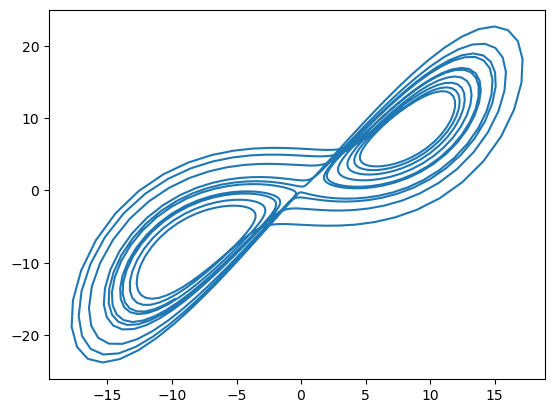

In [6]:
from dysts.flows import Lorenz

## Load and simulate an attractor
model = Lorenz()
t,x = model.make_trajectory(1000, resample=True, return_times=True)
plt.plot(x[:, 0], x[:, 1])



In [7]:
model = Lorenz()
t,x = model.make_trajectory(5000, resample=True, return_times=True)
dt=np.diff(t)[0]

key = random.PRNGKey(42)

rcn = RCN(key=key, n_input=3, dt =dt)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [9]:
rcn.train(x)
y = rcn.predict()

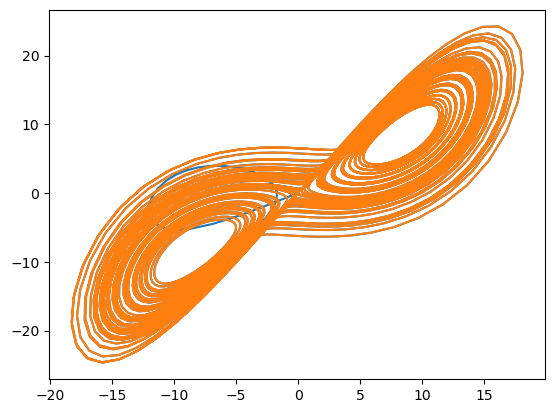

In [13]:
plt.plot(y[:,0], y[:,1])
plt.plot(x[:,0], x[:,1])

In [14]:
rcn.train_MSE()

Array(1.91150771e-06, dtype=float64)

In [26]:
jnp.array(model.rhs(x, t)).T.shape

(5000, 3)

Array([-0.86958707,  0.75474472,  0.99208181, -0.65855273, -1.08850361,
       -0.20554205,  1.07530843,  1.0343465 , -0.39282351,  0.43673097,
       -0.25679906, -0.49513478,  0.0272742 , -0.44920855,  0.79189262,
        0.0695728 ,  0.21712456,  0.19937623,  0.4247684 ,  0.14324231,
       -0.72408941,  0.67277921, -0.15414256,  0.38438069,  0.50011893,
        0.80183231,  1.8560666 ,  0.38243642,  0.06845773, -0.62277311,
        0.01165284, -0.38453704, -0.54087247,  0.02691239,  0.93568767,
        1.82103632,  1.87162754, -0.92094447,  0.33506415, -0.50754335,
       -1.75765671,  0.21395888,  0.22793992, -0.22382147, -0.43962264,
        1.01163669,  2.02135482,  0.35279512,  0.20869085, -0.51848227,
       -0.2920838 ,  0.51337757,  1.04565674,  0.941351  , -2.19598971,
       -1.10882632, -0.18608273,  0.07934235,  0.43344912,  0.83425692,
        0.65992934, -0.95639794, -0.70876597, -0.01832717, -0.00470322,
       -1.23200623,  0.08380006, -0.86161558,  1.20915025,  0.33

In [8]:
model.dt = 0.001

In [9]:
model.dt

0.001

In [10]:

model.dt = 0.001
t,x = model.make_trajectory(100, resample=False, return_times=True)
dt=np.diff(t)[0]
dt

0.001

In [11]:
Lorenz

dysts.flows.Lorenz

In [1]:
import numpy as np
from copy import copy
import jax.numpy as jnp
from jax import random, grad, jit
from functools import partial
from RCN import RCN
from dysts.datasets import load_dataset
from dysts.flows import Lorenz

model = Lorenz()
dt= 0.001
L_train = 9000
L_test = 50000
L_remove = 1000

In [2]:
model.dt = dt
x_tot = model.make_trajectory(L_train + L_test + L_remove, resample=False, return_times=False)


x = x_tot[L_remove:L_remove+L_train ]
x_test = x_tot[L_remove+L_train:]

In [3]:
plt.plot(x[:,0])

NameError: name 'plt' is not defined

In [15]:
rcn.W_out.dtype

dtype('float64')